In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Mounted at /content/drive


In [ ]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 11. 검정

- 통계적 가설검정
- 사나리오

> A 학생은 학교에서 돌아오는 길에 종종 편의점에 들러 감자튀김을 구매한다. 이 감자튀김의 무게는 평균 130g으로 알려져 있지만, 어느날 A 학생이 감자튀김의 무게를 측정해보았더니, 122.02g밖에 되지 않았다. 이 편의점에서 파는 감자튀김의 무게가 실제로는 평균인 130g보다 적게 나가는 게 아닌가 의구심이 들기 시작한 A 학생은, 그날부터 2주간 매일 감자튀김을 사서 무게를 측정하였다. 그리고 2주 후, 그동안 구매한 14개 표본의 평균을 계산한 결과 128.451g이 나왔다. 14개 표본의 평균 무게가 130g보다 적다고 확신한 A 학생은 편의점에 항의했지만, 편의점 측은 그저 우연일 뿐이라고 일축해버렸다. 14개의 표본의 평균이 128.451g으로 나온 건 정말 우연이었을까?

- 11-1절 개념
- 11-2절 실제

- 임포트

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# 소수점 이하 3자리까지 출력
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)

# 결과의 재현성을 위해 난수 시드 생성
np.random.seed(1111)

- ch11_potato.csv

In [ ]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch11_potato.csv')
sample = np.array(df['무게'])
printobj(sample)

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])


 <class 'numpy.ndarray'> 



- 표본평균을

In [ ]:
s_mean = np.mean(sample)
printobj(s_mean)

128.4507142857143


 <class 'numpy.float64'> 



### 11-1. 통계적 가설검정

- **통계적 가설검정**(statistical hypothesis testing)이란
  - 두 가지 가설
  - 표본 통계량
  - 판단
  - 검정

- 관련 용어

#### 1) 통계적 가설검정의 기본

- 모평균이 130g보다 작은지
  - 정규분포
  - 모분산 9

- 가정: 모평균 = 130g
  - $X_{1}, X_{2}, ⋯, X_{14} \overset{iid}{∼}N(130,9)$
  - $\bar{X} ∼ N(130, \frac{9}{14})$
- $\bar{X}$는 확률변수

- $P(\bar{X}≤x)=0.05$인  $x$

In [ ]:
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

- $P(\bar{X}≤128.681)=0.05$
  - $5\%$ 확률
- 128.45g은 드문 사건

- 그저 운이 나빴다 vs 가정이 이상하다
- $5\%$ 확률로 우연히? → 모평균이 130g보다 작은 게 아닐까? → ⋯
- 가설검정의 큰 흐름

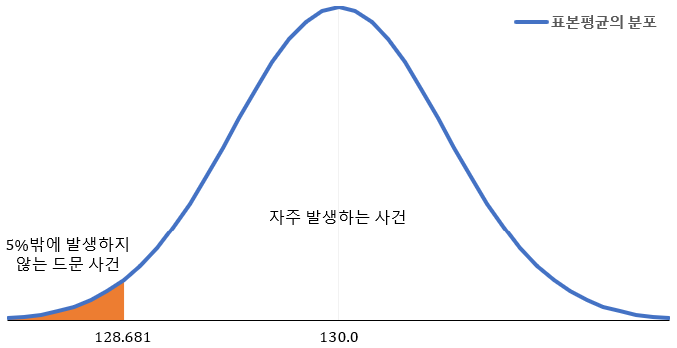

[그림 11-1] 귀무가설을 가정한 감자튀김의 분포

- **귀무가설**(null hypothesis) vs **대립가설**(alternative hypothesis)
- $H_0$ vs $H_1$

- 표본 통계량
- '귀무가설을 기각한다'(reject null hypothesis)
- '귀무가설을 채택한다'(accept null hypothesis)

- 표본 통계량이 드문 값인지
- **유의하다**(significant)

- 감자튀김 사례
  - 대립가설 '모평균은 130g보다 작다'
  - 귀무가설 '모평균은 130g'
  - 귀무가설 기각 or 채택

- 표본평균 128.451g → 유의 → 귀무가설 기각

- **기각역**(rejection region)
- **채택역**(acceptance region)
- 그림 11-1
- **유의수준**(level of significance)
- **임계값**(ciritical value)
- **검정통계량**(test estimate)
- 감자튀김 예
  - 유의수준 $5\%$
  - 검정통계량으로 표본평균
  - 임계값 $128.681$

- 그림 11-2
  - 임계값
  - 유의수준
  - **p값**(p-value)

- p값과 유의수준의 비교
  - p값 < 유의수준 → 귀무가설 기각


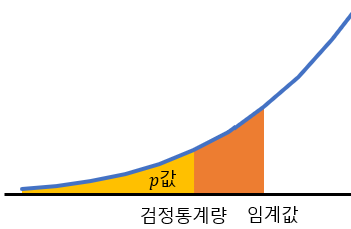

[그림 11-2] p값

- 다시 한 번
- 귀무가설 '모평균은 130g'
  - $X_{1}, X_{2}, ⋯, X_{14} \overset{iid}{∼}N(130,9)$
  - $\bar{X} ∼ N(130, \frac{9}{14})$

- 일반화된 형태
  - $\bar{X}$ 표준화
  - $Z=(\bar{X}-130)/\sqrt{\frac{9}{14}}$
  - $z_α$
  - $P((\bar{X}-130)/\sqrt{\frac{9}{14}}≤x)=0.05$인 $x$
  - $x=z_{0.95}$

- 검정통계량 vs 임계값

> $(\bar{X}-130)/\sqrt{\frac{9}{14}} ≤ z_{0.95}$ 이면 귀무가설을 기각<br><br>
>
> $(\bar{X}-130)/\sqrt{\frac{9}{14}} ≥ z_{0.95}$ 이면 귀무가설을 채택

- 검정통계량

In [ ]:
z = (s_mean - 130) / np.sqrt(9/14)  # test estimate
printobj(z)

-1.932298779026813


 <class 'numpy.float64'> 



- 임계값

In [ ]:
rv = stats.norm()
c = rv.isf(0.95)  # critical value
printobj(c)

-1.6448536269514722


 <class 'numpy.float64'> 



- 귀무가설은 기각
- 표본평균일 때와 동일한 결론

- p값
- 누적분포함수

In [ ]:
p = rv.cdf(z)  # p-value
printobj(p)

0.026661319523126635


 <class 'numpy.float64'> 



- 귀무가설 기각
- p값 가설검점도 동일한 결론

- p값 기준 가설검정의 흐름

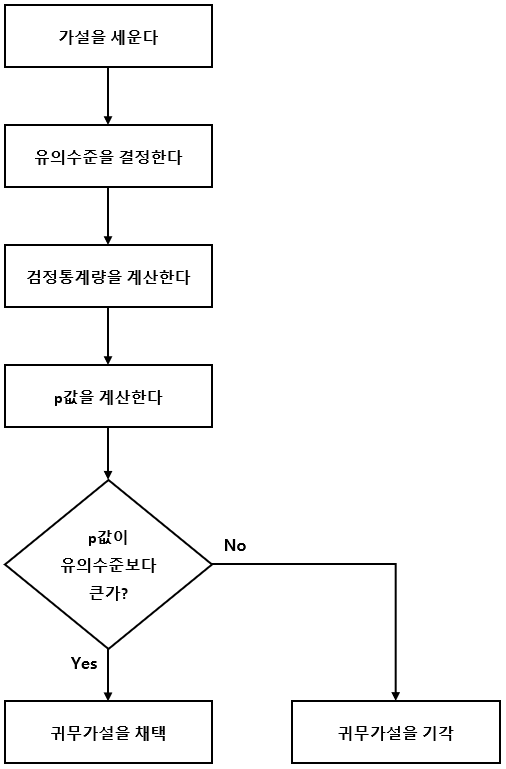

[그림 11-3] 가설검정의 흐름

#### 2) 단측검정과 양측검정

- '작다'라는 대립가설
- '아니다'라는 대립가설
- **단측검정** vs **양측검정**

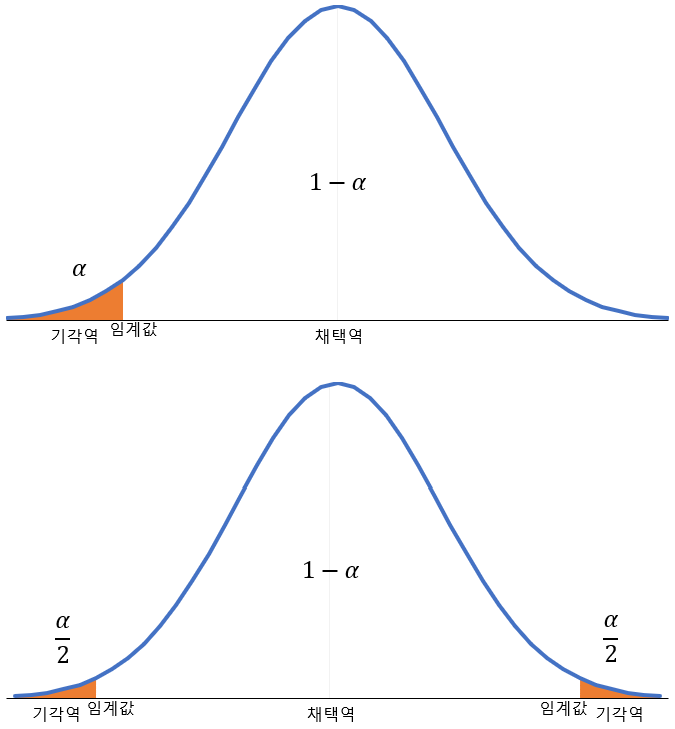

[그림 11-4] 단측검정과 양측검정

- 단측검정 기각역 넓어짐 → 기각하기 쉬움

- 감자튀김 예의 양측검정

In [ ]:
z = (s_mean - 130) / np.sqrt(9/14)  # 검정통계량
printobj(z)

-1.932298779026813


 <class 'numpy.float64'> 



- 임계값 $z_{0.975}$

In [ ]:
rv = stats.norm()
c = rv.isf(0.975)  # 임계값
printobj(c)

-1.959963984540054


 <class 'numpy.float64'> 



- 표준정규분포 $95\%$ 구간

In [ ]:
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

- 채택역에 속함 → 귀무가설 기각 안됨

- p값 $α/2$와 비교
- 누적밀도함수 값 2배 vs 유의수준 $α$

In [ ]:
c = rv.cdf(z) * 2  # 양측검정用
printobj(c)

0.05332263904625327


 <class 'numpy.float64'> 



- 귀무가설은 기각 안 됨

#### 3) 가설검정의 두 가지 오류

- 두 가지

> **제1종 오류** : 귀무가설이 옳을 때, 귀무가설을 기각하는 오류
>
> **제2종 오류** : 대립가설이 옳을 때, 귀무가설을 채택하는 오류

- 감자튀김의 예

##### <u>제1종 오류</u>

- '작다'
- **오탐**(false positive)

- 시뮬레이션

In [ ]:
rv = stats.norm(130, 3)

- 가설검정 10000번
- 제1종 오류 비율

In [ ]:
c = stats.norm().isf(0.95)  # 임계값
n_trial = 10000  # 가설검정 만번 시도
count = 0
for _ in range(n_trial):
    sample_ = rv.rvs(14)  # 표본 14개 추출
    s_mean_ = np.mean(sample_)  # 표본평균
    z = (s_mean_-130)/np.sqrt(9/14)  # 검정통계량
    if z < c:  # 제1종 오류라면...
        count += 1
count / n_trial

0.053

- 대략 $5\%$ 비율로 오탐

- **위험률** $α$
- 유의수준과 일치 → 제어 가능

##### <u>제2종 오류</u>

- '작다'고 할 수 없다
- **미탐**(false negative)

- 시뮬레이션
- 비밀문서 입수
  - $N(128,3^2)$

In [ ]:
rv = stats.norm(128, 3)

- 동일한 방법

In [ ]:
c = stats.norm().isf(0.95)  # 임계값
n_trial = 10000  # 가설검정 만번 시도
count = 0
for _ in range(n_trial):
    sample_ = rv.rvs(14)  # 표본 14개 추출
    s_mean_ = np.mean(sample_)  # 표본평균
    z = (s_mean_-130)/np.sqrt(9/14)  # 검정통계량
    if z >= c:  # 제2종 오류라면...
        count += 1
count / n_trial

0.198

- 대략 $20\%$의 비율로 미탐
- 제2종 오류 확률 $β$
- **검정력**(power) $(1-β)$
- 모집단 정보에 의존 → 제어 불가

- 비대칭성
  - 제1종 오류 제어 가능
  - 제2종 오류 제어 불가

### 11-2. 기본적인 가설검정

- 정규분포 모평균/모분산
- 양측검정 → 단측검정도 동일

#### 1) 정규분포의 모평균에 대한 검정 : 모분산을 알고 있는 경우

- $μ_0$ 아님 주장
- $σ^2$ 알고 있는 상황

> **정규분포의 모평균에 대한 가설점정 : 모분산을 알고 있는 경우**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$이라고 하자.
> - 이때 모평균 $μ$에 대한 유의수준 $α$의 양측검점<br><br>
>
>   - 귀무가설 : $μ = μ_0$
>   - 대립가설 : $μ ≠ μ_0$<br><br>
>
>   은, 검정통계량으로 $Z=(\bar{X}-μ_0)/\sqrt{\frac{σ^2}{n}}$을 사용하여<br><br>
$$
\begin{cases}
Z < z_{1-\frac{α}{2}} \; 또는 \; z_{\frac{α}{2}} < Z \; 라면, \; 귀무가설을 \; 기각 \\\\
z_{1-\frac{α}{2}} ≤ Z ≤ z_{\frac{α}{2}} \; 라면, \; 귀무가설을 \; 채택
\end{cases}
\tag{11-1}
$$<br>
>   으로 수행된다.

- 파이썬 함수

In [ ]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

- 감자튀김

In [ ]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053


- 11-1절 양측검정과 동일

#### 2) 정규분포의 모분산에 대한 검정

- $σ_0^2$ 아님 주장
- 검정통계량 $Y=\frac{(n-1)S^2}{σ_0^2}$
- $Y∼χ^2(n-1)$

> **정규분포의 모분산에 대한 가설점정**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$이라고 하자.
> - 이때 모분산 $σ^2$에 대한 유의수준 $α$의 양측검점<br><br>
>
>   - 귀무가설 : $σ^2 = σ_0^2$
>   - 대립가설 : $σ^2 ≠ σ_0^2$<br><br>
>
>   은, 검정통계량으로 $Y=\frac{(n-1)S^2}{σ_0^2}$을 사용하여<br><br>
$$
\begin{cases}
Y < χ^2_{1-\frac{α}{2}}(n-1) \; 또는 \; χ^2_{\frac{α}{2}}(n-1) < Y \; 라면, \; 귀무가설을 \; 기각 \\\\
χ^2_{1-\frac{α}{2}}(n-1) ≤ Y ≤ χ^2_{\frac{α}{2}}(n-1) \; 라면, \; 귀무가설을 \; 채택
\end{cases}
\tag{11-2}
$$<br>
>   으로 수행된다.

In [ ]:
def pvar_test(sample, var0, alpha=0.05):
    s_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)

    y = (n - 1) * s_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

- 감자튀김
  - $σ_0^2=9$

In [ ]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


#### 3) 정규분포의 모평균에 대한 검정 : 모분산을 모르는 경우

- **1표본 t 검정**(one-sample t-test)
- **t 검정통계량** $t=(\bar{X}-μ_0)/\sqrt{\frac{S^2}{n}}$
- $t \sim t(n-1)$

> **정규분포의 모평균에 대한 가설점정 : 모분산을 모르는 경우**

> $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼}N(μ,σ^2)$이라고 하자.
> - 이때 모평균 $μ$에 대한 유의수준 $α$의 양측검점<br><br>
>
>   - 귀무가설 : $μ = μ_0$
>   - 대립가설 : $μ ≠ μ_0$<br><br>
>
>   은, 검정통계량으로 $t=(\bar{X}-μ_0)/\sqrt{\frac{S^2}{n}}$을 사용하여<br><br>
$$
\begin{cases}
t < t_{1-\frac{α}{2}}(n-1) \; 또는 \; t_{\frac{α}{2}}(n-1) < t \; 라면, \; 귀무가설을 \; 기각 \\\\
t_{1-\frac{α}{2}}(n-1) ≤ t ≤ t_{\frac{α}{2}}(n-1) \; 라면, \; 귀무가설을 \; 채택
\end{cases}
\tag{11-3}
$$<br>
>   으로 수행된다.

In [ ]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    s_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(s_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

- 감자튀김

In [ ]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


- scipy.stats.ttest_1samp()
  - t & p값 반환

In [ ]:
t, p = stats.ttest_1samp(sample, 130)
printobj(t, p)

-1.4551960206404198


 <class 'numpy.float64'> 



0.16933464230414275


 <class 'numpy.float64'> 



- 동일한 p값